In [1]:
from amplpy import AMPL
import numpy as np

In [2]:
import sys
import os.path
from amplpy import AMPL
import time
import math
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
lp = AMPL()
lp.read("test.mod")
lp.readData("test.dat")
lp.setOption("solver", "cplex")
lp.solve()

CPLEX 20.1.0.0: optimal solution; objective -3.965284356
14 dual simplex iterations (1 in phase I)


In [4]:
ndata = lp.getData("n")

In [5]:
n = int(ndata.getRowByIndex(0)[0])
solveres = lp.getData("solve_result")
solve_result = solveres.getRowByIndex(0)[0]
objfun = lp.getObjective("objfun")
objfunval = objfun.value()

In [6]:
xvar = lp.getVariable("x")
x = np.zeros(n)
for j in range(n):
    x[j] = xvar[j+1].value()


In [7]:
x

array([0.52014148, 0.        , 0.49526051, 0.52329804, 0.11965845,
       1.98367016, 2.11780334, 0.14334475, 0.34650991, 0.76706277,
       0.        , 0.74148466, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.11934371, 1.42389536])

In [8]:
import sys
import cvxpy as cp
import math
import time
import numpy as np

In [9]:
n = 5
X = cp.Variable((n,n), PSD=True)
A = np.random.rand(n,n)
objfun = cp.trace(A.T@X)


In [10]:
constr1 = [X[i,i+1] + X[i,i+2] <= -1 for i in range(n-2)]
constr2 = [cp.diag(X) == 1]
objective = cp.Minimize(objfun)

In [11]:
constraints = constr1 + constr2
prob = cp.Problem(objective, constraints)
prob.solve(cp.SCS, verbose=True)
Xv = X.value
print(Xv)


                                     CVXPY                                     
                                     v1.3.0                                    
(CVXPY) Feb 03 06:18:41 PM: Your problem has 25 variables, 4 constraints, and 0 parameters.
(CVXPY) Feb 03 06:18:41 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 03 06:18:41 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 03 06:18:41 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Feb 03 06:18:41 PM: Compiling problem (target solver=SCS).
(CVXPY) Feb 03 06:18:41 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> 

In [12]:
from functions import *

In [13]:
myZero = 1e-8
LPsolver = "cplex"
NLPsolver = "ipopt"
#projmethod = "Barvinok"
projmethod = "PCA"
showplot = True

In [14]:
(Kdim, n, E) = readDat("1guu-1_gph.dat")

In [15]:
Kdim

3

In [16]:
n

150

In [17]:
E[:5]

[(1, 2, 1.49, 1.49),
 (1, 3, 2.48979, 2.48979),
 (1, 4, 2.74218, 2.74218),
 (1, 5, 4.1497, 4.1497),
 (1, 6, 4.67876, 4.67876)]

In [18]:
G = {i:dict() for i in range(n)}
for e in E:
    i = e[0]-1 # first vertex
    j = e[1]-1 # second vertex
    w = e[2] # edge weight
    if i > j:
        t = i
        i = j
        j = t
    G[i][j] = w 
G[0]

{1: 1.49, 2: 2.48979, 3: 2.74218, 4: 4.1497, 5: 4.67876}

In [19]:
ddp = AMPL()
ddp.read("dgp_ddp.mod")
ddp.readData("1guu-1_gph.dat")
ddp.setOption('solver', LPsolver)
ddp.solve()
objfun = ddp.getObjective('push')
objfunval = objfun.value()
print("optimal obj. fun. value =", objfunval)
Xvar = ddp.getVariable('X')
X = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        X[i,j] = Xvar[i+1,j+1].value()

CPLEX 20.1.0.0: optimal solution; objective 17924.67891
0 dual simplex iterations (0 in phase I)
30 barrier iterations
optimal obj. fun. value = 17924.678906051766


In [20]:
X.shape

(150, 150)

In [21]:
print("ambient dimension n =", n)
Y = MDS(X)
K = Y.shape[1]
print("found relaxed embedding in natural dimension K =", K)
if K not in {2,3}:
    if K < 2:
        K = 2
    elif K > 3:
        K = 3
print("now projecting to", K, "principal dimensions")
if projmethod == "PCA":
    xbar = PCA(X, K)
elif projmethod == "Barvinok":
    xbar = Barvinok(X, K)

ambient dimension n = 150
found relaxed embedding in natural dimension K = 150
now projecting to 3 principal dimensions


In [22]:
xbar

array([[ 6.17427278e-07, -1.14027372e-05,  6.24203301e-06],
       [ 5.40296513e-07, -1.01960802e-05,  5.56367066e-06],
       [ 1.43190851e-08,  1.80620269e-06, -1.35095645e-07],
       [ 1.14746930e-06, -8.26622987e-06,  4.26679088e-06],
       [-4.70528879e-07,  4.27028520e-06, -2.58550490e-06],
       [-8.45529514e-07,  1.33744714e-05, -6.44100154e-06],
       [-8.10050051e-08, -9.75545869e-06,  7.13958456e-07],
       [-3.46515917e-06,  2.36845314e-05, -1.19257628e-05],
       [ 1.16464791e-06, -7.21718490e-06,  4.68374334e-06],
       [ 3.64590105e-06, -4.96755740e-05,  2.04498783e-05],
       [ 1.93305975e-07,  2.27746146e-05, -1.66606241e-06],
       [ 9.47157694e-06, -5.90662811e-05,  2.84338006e-05],
       [-1.95978873e-05,  1.06849668e-04, -6.82766787e-05],
       [-1.03510525e-05,  1.31990888e-04, -5.24075272e-05],
       [-6.85991468e-07, -7.45000086e-05,  5.25086437e-06],
       [-4.45463369e-05,  2.57836614e-04, -1.19660985e-04],
       [-1.93556449e-05,  1.18770448e-04

In [23]:
mderr1 = mde(xbar, G)
print("DDP mean distance error =", mderr1)
lderr1 = lde(xbar, G)
print("DDP largest distance error =", lderr1)
# t1 = time.time()
# cputime1 = t1-t0
# print("DDP cpu time =", cputime1)

DDP mean distance error = 3.0113798792673356
DDP largest distance error = 4.983680675400617


In [24]:
nlp = AMPL()
nlp.read("dgp.mod")
nlp.readData("1guu-1_gph.dat")
nlp.setOption('solver', NLPsolver)
xvar = nlp.getVariable('x')
for i in range(n):
    for k in range(K):
        xvar[i+1,k+1].setValue(xbar[i,k])
nlp.solve()
xvar = nlp.getVariable('x')
xval = xvar.getValues()
x = np.zeros((n,K))
for i in range(n):
    for k in range(K):
        x[i,k] = xvar[i+1,k+1].value()

Ipopt 3.9.1: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Common Public License (CPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

NOTE: You are using Ipopt by default with the MUMPS linear solver.
      Other linear solvers might be more efficient (see Ipopt documentation).


This is Ipopt version 3.9.1, running with linear solver mumps.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     9531

Total number of variables............................:      450
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
   

  82 1.3233026e+003 0.00e+000 1.50e+000  -1.7 8.14e-001 -11.6 1.00e+000 1.00e+000f  1
  83 1.3184521e+003 0.00e+000 1.37e+000  -1.7 2.56e+000 -12.1 1.00e+000 2.50e-001f  3
  84 1.3065620e+003 0.00e+000 1.44e+000  -1.7 6.63e-001 -12.5 1.00e+000 1.00e+000f  1
  85 1.3016617e+003 0.00e+000 3.06e+000  -1.7 1.19e+000 -13.0 1.00e+000 1.00e+000f  1
  86 1.3010383e+003 0.00e+000 4.17e+000  -1.7 1.23e+000 -13.5 1.00e+000 1.00e+000f  1
  87 1.2901927e+003 0.00e+000 3.13e+000  -1.7 3.02e+000 -14.0 1.00e+000 2.50e-001f  3
  88 1.2713837e+003 0.00e+000 1.29e+000  -1.7 5.64e-001 -14.5 1.00e+000 1.00e+000f  1
  89 1.2693443e+003 0.00e+000 2.26e+000  -1.7 2.06e+000 -14.0 1.00e+000 5.00e-001f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  90 1.2599919e+003 0.00e+000 5.81e-001  -1.7 3.84e-001 -14.5 1.00e+000 1.00e+000f  1
  91 1.2586047e+003 0.00e+000 1.59e+000  -1.7 3.53e+000 -14.1 1.00e+000 2.50e-001f  3
  92 1.2531061e+003 0.00e+000 1.27e+000  -1.7 7.12e-001 -14

 175 1.2086213e+003 0.00e+000 1.24e-001  -3.8 2.48e-001 -14.1 1.00e+000 1.00e+000f  1
 176 1.2085923e+003 0.00e+000 8.88e-002  -3.8 3.07e-001 -14.6 1.00e+000 5.00e-001f  2
 177 1.2085484e+003 0.00e+000 8.91e-002  -3.8 1.99e-001 -14.2 1.00e+000 1.00e+000f  1
 178 1.2085241e+003 0.00e+000 9.14e-002  -3.8 3.33e-001 -14.6 1.00e+000 5.00e-001f  2
 179 1.2084856e+003 0.00e+000 1.21e-001  -3.8 2.38e-001 -14.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 180 1.2084613e+003 0.00e+000 1.03e-001  -3.8 2.82e+001 -14.7 1.00e+000 5.00e-001f  2
 181 1.2084183e+003 0.00e+000 8.25e-002  -3.8 2.02e-001 -14.3 1.00e+000 1.00e+000f  1
 182 1.2084122e+003 0.00e+000 1.58e-001  -3.8 2.05e+000 -14.7 1.00e+000 5.00e-001f  2
 183 1.2083585e+003 0.00e+000 1.16e-001  -3.8 2.35e-001 -14.3 1.00e+000 1.00e+000f  1
 184 1.2083429e+003 0.00e+000 1.02e-001  -3.8 1.06e+000 -13.9 1.00e+000 1.25e-001f  4
 185 1.2083062e+003 0.00e+000 5.74e-002  -3.8 1.48e-001 -14

In [25]:
x[:5]

array([[ 47.03562153, -12.3205818 ,  14.69695635],
       [ 46.91116996, -11.31449763,  13.59688653],
       [ 45.84377364, -11.74347029,  12.59752458],
       [ 44.73116798, -12.21479964,  13.1437663 ],
       [ 43.77129793, -12.95533928,  12.26043602]])

In [26]:
rlzbase = '.'.join(os.path.basename("1guu-1_gph.dat").split('.')[0:-1])
writeRlz(x,n,K, rlzbase + "-sol.dat")

# realization for 1guu-1_gph-sol.dat <_io.TextIOWrapper name='1guu-1_gph-sol.dat' mode='w' encoding='cp936'>
param xbar := <_io.TextIOWrapper name='1guu-1_gph-sol.dat' mode='w' encoding='cp936'>
 1 1  47.03562153287206 <_io.TextIOWrapper name='1guu-1_gph-sol.dat' mode='w' encoding='cp936'>
 1 2  -12.320581798912107 <_io.TextIOWrapper name='1guu-1_gph-sol.dat' mode='w' encoding='cp936'>
 1 3  14.696956349862269 <_io.TextIOWrapper name='1guu-1_gph-sol.dat' mode='w' encoding='cp936'>
 2 1  46.91116995675775 <_io.TextIOWrapper name='1guu-1_gph-sol.dat' mode='w' encoding='cp936'>
 2 2  -11.314497631316238 <_io.TextIOWrapper name='1guu-1_gph-sol.dat' mode='w' encoding='cp936'>
 2 3  13.596886529958349 <_io.TextIOWrapper name='1guu-1_gph-sol.dat' mode='w' encoding='cp936'>
 3 1  45.84377363858177 <_io.TextIOWrapper name='1guu-1_gph-sol.dat' mode='w' encoding='cp936'>
 3 2  -11.743470287099997 <_io.TextIOWrapper name='1guu-1_gph-sol.dat' mode='w' encoding='cp936'>
 3 3  12.597524578422233 <_io

In [27]:
mderr2 = mde(x, G)
print("NLP mean distance error =", mderr2)
lderr2 = lde(x, G)
print("NLP largest distance error =", lderr2)
# t2 = time.time()
# cputime2 = t2-t1
# print("NLP cpu time =", cputime2)

NLP mean distance error = 0.10431180368558095
NLP largest distance error = 1.0805555045388653


C:\Users\Junkai XIA\AppData\Local\Temp\ipykernel_20244\3978406632.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


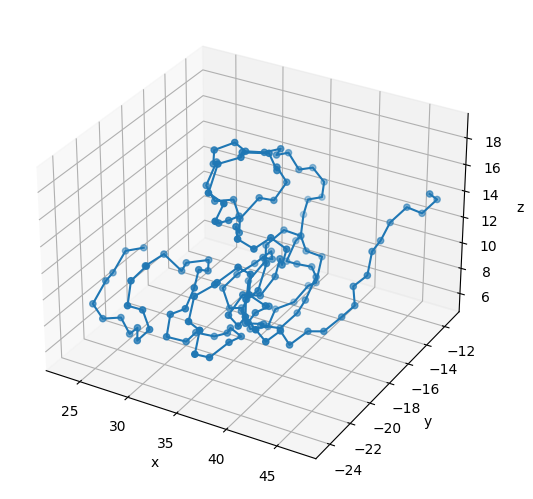

In [28]:
if showplot:
    if K == 2:
        plt.scatter(x[:,0], x[:,1])
        plt.plot(x[:,0], x[:,1])
    elif K == 3:
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.scatter(x[:,0], x[:,1], x[:,2])
        ax.plot(x[:,0], x[:,1], x[:,2])
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')    
    plt.show()